<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


In [1]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 11.9 MB/s eta 0:00:00


In [2]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# List of years
year_list = [i for i in range(1980, 2024, 1)]

# Create the layout of the app
app.layout = html.Div([
    html.H1("Automobile Sales Analysis Dashboard", style={'text-align': 'center'}),
    html.Div([
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='statistics-dropdown',
            options=[
                {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
            ],
            value='Yearly Statistics',
            style={'width': '75%'}
        )
    ]),
    html.Div([
        dcc.Dropdown(
            id='select-year',
            options=[{'label': str(i), 'value': i} for i in year_list],
            value=2023,
            style={'width': '75%'}
        )
    ]),
    html.Div(id='output-container', className='output-container-style', style={'padding': '20px', 'margin-top': '20px'})
])

# Callback to enable/disable year selection based on statistics dropdown
@app.callback(
    Output('select-year', 'disabled'),
    [Input('statistics-dropdown', 'value')]
)
def toggle_year_dropdown(selected_statistics):
    return selected_statistics != 'Yearly Statistics'

# Callback to update the output container based on the selected statistics
@app.callback(
    Output('output-container', 'children'),
    [Input('statistics-dropdown', 'value'), Input('select-year', 'value')]
)

def update_output_container(selected_statistics, selected_year):
    if selected_statistics == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]
        # Plot 1: Automobile sales fluctuate over Recession Period (year wise)
        fig1 = px.line(recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index(),
                       x='Year', y='Automobile_Sales', title="Average Automobile Sales Fluctuation Over Recession Period")

        # Plot 2: Average number of vehicles sold by vehicle type
        fig2 = px.bar(recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index(),
                      x='Vehicle_Type', y='Automobile_Sales', title="Average Number of Vehicles Sold by Vehicle Type")

        # Plot 3: Pie chart for total expenditure share by vehicle type during recessions
        exp_data = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        fig3 = px.pie(exp_data, values='Advertising_Expenditure', names='Vehicle_Type',
                      title="Total Expenditure Share by Vehicle Type")

        # Plot 4: Effect of unemployment rate on vehicle type and sales
        unemp_data = recession_data.groupby(['Vehicle_Type', 'unemployment_rate'])['Automobile_Sales'].mean().reset_index()
        fig4 = px.bar(unemp_data, x='unemployment_rate', y='Automobile_Sales', color='Vehicle_Type',
                      title='Effect of Unemployment Rate on Vehicle Type and Sales')

        return [dcc.Graph(figure=fig1), dcc.Graph(figure=fig2), dcc.Graph(figure=fig3), dcc.Graph(figure=fig4)]

    elif selected_statistics == 'Yearly Statistics':
        yearly_data = data[data['Year'] == selected_year]
        # Plot 1: Yearly Automobile sales
        fig1 = px.line(yearly_data.groupby('Year')['Automobile_Sales'].mean().reset_index(),
                       x='Year', y='Automobile_Sales', title="Yearly Automobile Sales")

        # Plot 2: Monthly Automobile sales
        fig2 = px.line(yearly_data.groupby('Month')['Automobile_Sales'].sum().reset_index(),
                       x='Month', y='Automobile_Sales', title="Monthly Automobile Sales")

        return [dcc.Graph(figure=fig1), dcc.Graph(figure=fig2)]

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

# **Create visualizations using Matplotib, Seaborn and Folium**

Estimated time needed: **40** minutes

In this assignment, you will have the opportunity to demonstrate the skills you have acquired in creating visualizations using *Matplotlib, Seaborn, Folium*.
<br>
<br>
<span style="color:red">After each task you will be required to save your plots as an image or screenshot using the filenames specified.  You will be uploading these images during your final project submission so they can be evaluated by your peers. </span>


# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            </ol>
    </li>
    <li>
        <a href="#Scenario">Scenario</a>
        <ol>
            <li><a href="#Data Description">Data Description</a></li>
        </ol>
    </li>
    <li><a href="#Importing Data">Importing data</a></li>
    <li><a href="#Creating Visualizations for Data Analysis">Creating Visualizations for Data Analysis</a></li>
</ol>


# Objectives

After completing this lab you will be able to:

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*  [`Folium`](https://python-visualization.github.io/folium/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run these notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


In [3]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# %pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"

In [4]:
%pip install seaborn
%pip install folium
%pip install requests

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium



<details><summary>Click here for a hint</summary>

<p>
You will require:-
<br>Numpy for many scientific computing in Python
<br>Pandas for creating and working on dataframe, also for plotting directly on dataframe/series
<br>The inline backend to generate the plots within the browser [%matplotlib inline]
<br>Matplotlib and its pyplot pacakge for plotting
<br>Seaborn for plotting
</details>





<details><summary>Click here for python solution</summary>

```python
    #Import Primary Modules:
    import numpy as np
    import pandas as pd
    %matplotlib inline
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import seaborn as sns
    import folium
```

</details>


---


# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period.

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


---


# Importing Data


#### For your convenience, we have already written code to import the data below.


In [6]:
import requests
import pandas as pd
from io import BytesIO


URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Sending a GET request to the URL
resp = requests.get(URL)

# Checking if the request was successful
if resp.status_code == 200:
    # Creating a BytesIO object from the content of the response
    text = BytesIO(resp.content)

    # Reading the data into a pandas DataFrame
    df = pd.read_csv(text)

    print('Data downloaded and read into a dataframe!')
else:
    print("Failed to download data: HTTP Status Code", resp.status_code)


Data downloaded and read into a dataframe!


In [7]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [8]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


<details><summary>Click here for a hint</summary>

<p>
You will require:-
<br>to group the year and calculate the average on the 'Automobile Sales', as the data has years and months column
<br>make use of .plot() with kind = 'line'
<br>donot forget to include labels and title
</details>


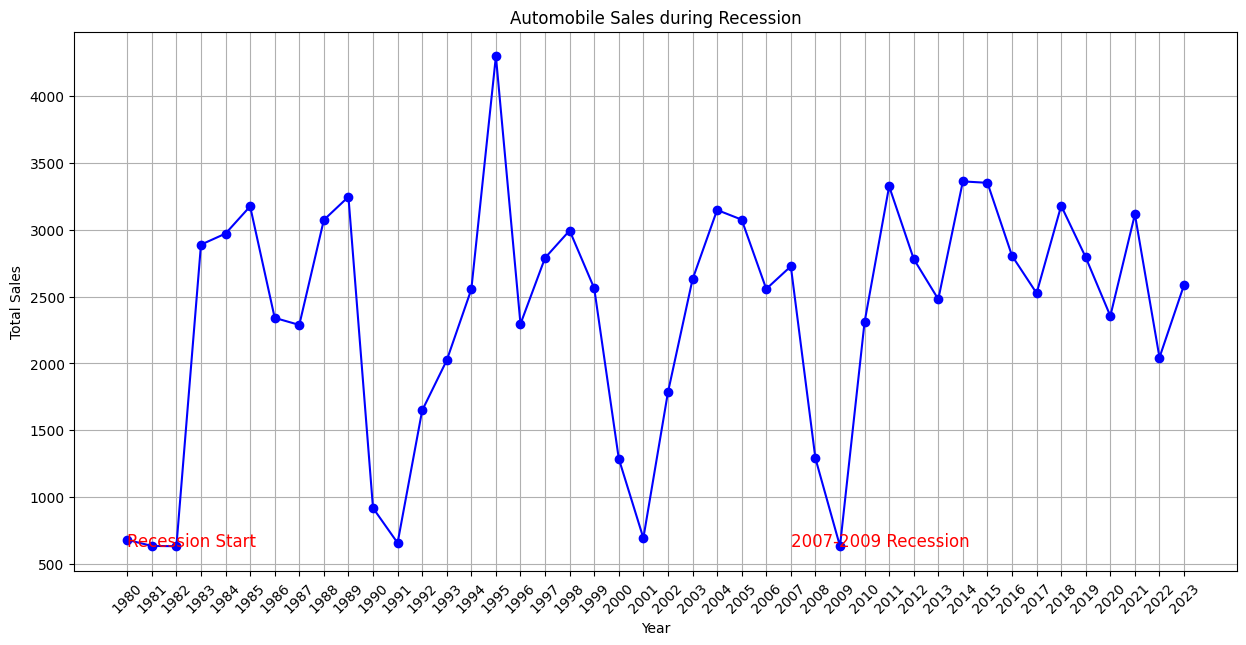

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
yearly_sales = df.groupby('Year')['Automobile_Sales'].mean()

# Plotting
plt.figure(figsize=(15, 7))
yearly_sales.plot(kind='line', marker='o', color='b')
plt.title('Automobile Sales during Recession')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(range(1980, 2024), rotation=45)
plt.grid(True)

plt.text(1980, yearly_sales.min(), 'Recession Start', fontsize=12, color='red')
plt.text(2007, yearly_sales.min(), '2007-2009 Recession', fontsize=12, color='red')
plt.show()


<details><summary>Click here for a solution template</summary>

```python
    #create data for plotting
    df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
    plt.figure(figsize=(10, 6))
    df_line.plot(kind = 'line')
    plt.xlabel('........')
    plt.ylabel('.........')
    plt.title('......................')
    plt.show()
```
</details>


### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession
<br>annotation for at least two years of recession
<br>Title as Automobile Sales during Recession
<br>


<details><summary>Click here for a hint</summary>
    <p>
    You can create the list for the range 1980 till 2023 and pass that list to the plt.xticks function or you can directly pass the range to the function.
    You might need to rotate the ticks to an angle so that they fit in well on the axis
    You can include annotation with plt.text(x, y, 'text to display')
    </p>
</details>


<details>
    <summary>Click here for Solution template</summary>

```python
    plt.figure(figsize=(10, 6))
    df_line = ...............
    df_line.plot(kind = 'line')
    plt.xticks(list(range(1980,2024)), rotation = 75)
    plt.xlabel('..............')
    plt.ylabel('............')
    plt.title('...................')
    plt.text(1982, 650, '1981-82 Recession')
    plt.text(......, ..., '..............')
    plt.legend()
    plt.show()
```

</details>


# **Inference:**

 The plot clearly shows fluctuations in automobile sales over the years, with notable dips during marked recession periods.

<span style="color:red">
Save this plot as "Line_Plot_1.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


<details><summary>Click here for a hint</summary>

<p>
    You will require:-
    <br>create a separate dataframe where the column recession has a value of '1'
    <br>to group the year, vehicle_type and calculate the average on the 'Automobile Sales'
    <br>one way is to -
    <br>use as_index as false else you will endup with multiple-indexed datafame
    <br>later set year as index and groupby vehicle over Sales and plot
    <br>make use of .plot() with kind = 'line'
    <br>do not forget to include labels and title
</p>
</details>


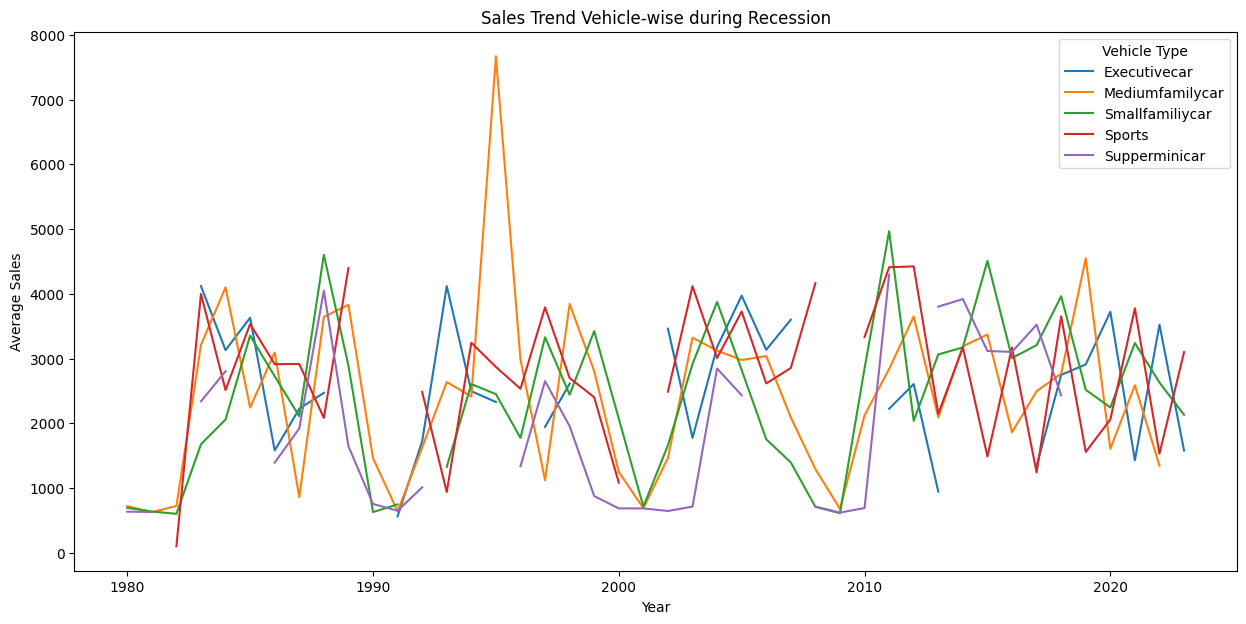

In [10]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.pivot(columns='Vehicle_Type', values='Automobile_Sales')
df_Mline.plot(kind='line', figsize=(15, 7))
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend(title='Vehicle Type')
plt.show()


<details>
    <summary>Click here for Solution template</summary>

```python
    df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
    df_Mline.set_index('Year', inplace=True)
    df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
    df_Mline.plot(kind='line')
    plt.xlabel('..............')
    plt.ylabel('............')
    plt.title('Sales Trend Vehicle-wise during Recession')
    plt.legend()
    plt.show()

```
</details>


#### From the above plot, what insights have you gained on the sales of various vehicle types?<br> Type in your answer below:


The plot reveals that different vehicle types have distinct sales trends, with some types showing resilience during recession periods while others experience significant declines. <br> <br> I can also see that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.
while sales of the superminicar and smallfamilycar increased.

<details>
    <summary>Inference</summary>
<p>
Inference:
From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.<br>while sales of the superminicar and smallfamilycar increased.<br><br>
    </p>
    </details>


<span style="color:red">
Save this plot as "Line_Plot_2.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


<details><summary>Click here for a hint</summary>

<p>
     To visualize the average number of vehicles sold during recession and non-recession periods, you can use a bar chart
        <br> You will need to group recession average Automobile_Sales and then plot it<br>
    Make use of sns.barplot(x=x,y=y, data = df)</p>
</details>


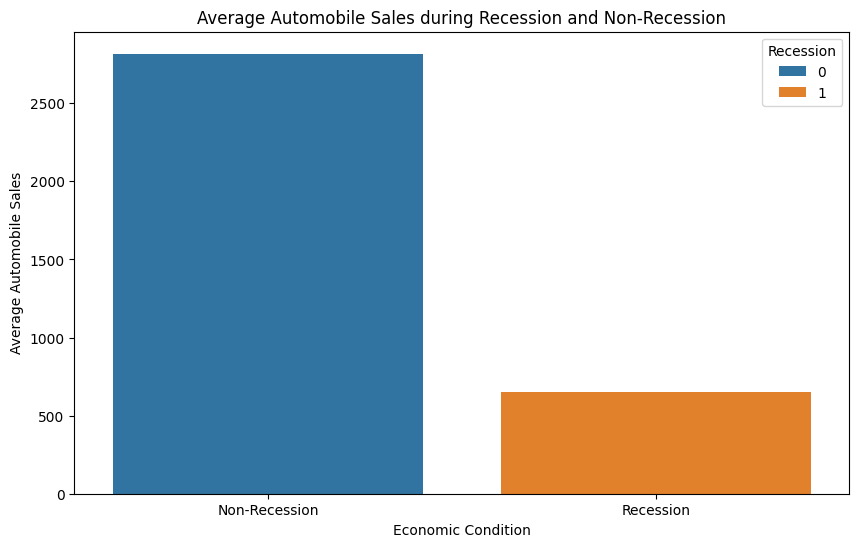

In [11]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Economic Condition')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()


<details>
    <summary>Click here for Solution template</summary>

```python
    new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

    # Create the bar chart using seaborn
    plt.figure(figsize=(.........., ............)
    sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
    plt.xlabel('............')
    plt.ylabel('...............')
    plt.title('Average Automobile Sales during Recession and Non-Recession')
    plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
    plt.show()
```

</details>


### Now you want to compare the sales of different vehicle types during a recession and a non-recession period
<br>We recommend that you use the functionality of **Seaborn Library** to create this visualization


<details><summary>Click here for a hint</summary>

<p>
     To visualize sales of different vehicles during recession and non-recession periods, you can use a bar chart
        <br> You will need to group Recession, Vehicle_Type for average Automobile_Sales and then plot it<br>
    Make use of sns.barplot(x=x,y=y, data = df)</p>
</details>


In [15]:
print(df.head())
print(df['Recession'].unique())  # This will show all unique values in the 'Recession' column
print(df['Vehicle_Type'].unique())

        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0 1980-01-31  1980   Jan          1               108.24                0.50   
1 1980-02-29  1980   Feb          1                98.75                0.75   
2 1980-03-31  1980   Mar          1               107.48                0.20   
3 1980-04-30  1980   Apr          1               115.01                1.00   
4 1980-05-31  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

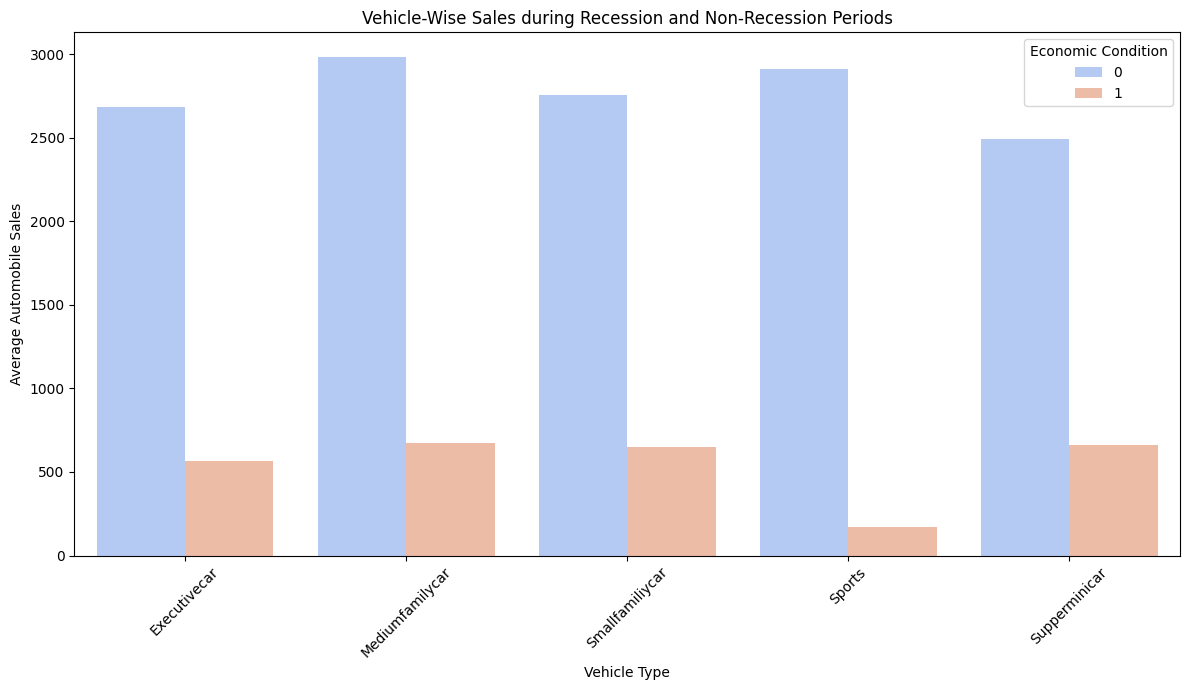

In [14]:

dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=dd, palette='coolwarm')

# Customize plot details
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Periods')
plt.legend(title='Economic Condition')

plt.tight_layout()  # Adjust the layout to make sure everything fits without overlap
plt.show()


<details>
<summary>Click here for Solution template</summary>

```python
   # Filter the data for recessionary periods
    recession_data = df[df['Recession'] == 1]

    dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

    # Calculate the total sales volume by vehicle type during recessions
    #sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

    # Create the grouped bar chart using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='......', y='........', hue='Vehicle_Type', data=dd)
    plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
    plt.xlabel('.............')
    plt.ylabel('..............')
    plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

    plt.show()

```
</details>


### From the above chart what insights have you gained on the overall sales of automobiles during recession? <br> Type your answer below:-


This visualization indicates that average automobile sales are lower during recession periods compared to non-recession periods.<br> <br> From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports

<details>
<summary>Inference</summary>

From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.<br>However, the most affected type of vehicle is executivecar and sports<br><br>
</details>


<span style="color:red">
Save this plot as "Bar_Chart.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods?
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


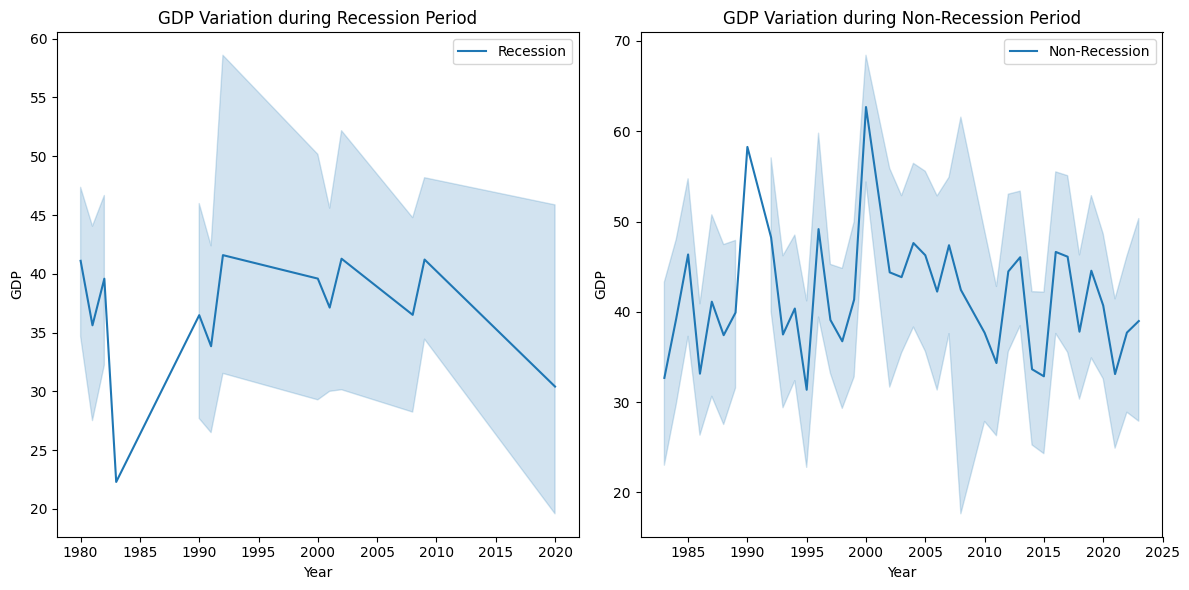

In [16]:
fig = plt.figure(figsize=(12, 6))
ax0 = fig.add_subplot(1, 2, 1)  # Recession GDP plot
ax1 = fig.add_subplot(1, 2, 2)  # Non-Recession GDP plot

sns.lineplot(x='Year', y='GDP', data=df[df['Recession']==1], label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

sns.lineplot(x='Year', y='GDP', data=df[df['Recession']==0], label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()


<details>
<summary>Click here for Solution template</summary>

```python
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    non_rec_data = df[df['Recession'] == 0]
    
    #Figure
    fig=plt.figure(figsize=(12, 6))
    
    #Create different axes for subploting
    ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
    ax1 = fig.add_subplot(... ,... ,... ) # add subplot 2 (1 row, 2 columns, second plot).
    
    #plt.subplot(1, 2, 1)
    sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
    ax0.set_xlabel('Year')
    ax0.set_ylabel('GDP')
    ax0.set_title('GDP Variation during Recession Period')
    
    #plt.subplot(1, 2, 2)
    sns.lineplot(x='......', y='......', data=........, label='.........',ax=...)
    ax1.set_xlabel('.....')
    ax1.set_ylabel('.......')
    ax1.set_title('..........')
    
    plt.tight_layout()
    plt.show()

   #------------------------------------------------Alternatively--------------
   #Using subplot()
    plt.figure(figsize=(............, ..........))
    
    #subplot 1
    plt.subplot(1, 2, 1)
    sns.lineplot(x='.........', y='......', data=.........., label='......')
    plt.xlabel('.......')
    plt.ylabel('..........')
    plt.legend()
    #subplot 1
    plt.subplot(1, 2, 2)
    sns.lineplot(x='.........', y='......', data=.........., label='......')
    plt.xlabel('.......')
    plt.ylabel('..........')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
```
</details>


### Inference

GDP trends vary significantly with economic conditions, generally lower during recession periods, which might affect consumer spending, including automobile purchases.
<br><br>
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company<br><br>


<span style="color:red">
Save this plot as "Subplot.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


<details><summary>Click here for a hint</summary>

<p>
     You can create Bubble Chart by calling the scatter()
        <br>Pass the 'Month' and 'Automobile_Sales' to the functions as x and y and then use Seasonality weight for size parameter</p>
</details>


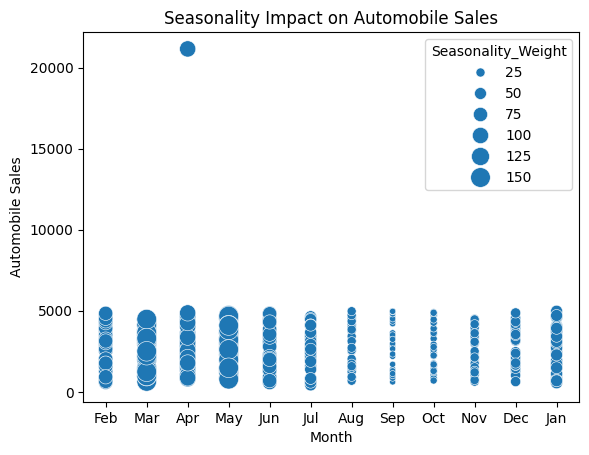

In [17]:
non_rec_data = df[df['Recession'] == 0]
size = non_rec_data['Seasonality_Weight'] * 100

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, sizes=(20, 200))
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')
plt.show()


<details>
<summary>Click here for Solution template</summary>

```python
    non_rec_data = df[df['Recession'] == 0]
    
    size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
    sns.scatterplot(data=non_rec_data, x='........', y='........', size=size)
    
    #you can further include hue='Seasonality_Weight', legend=False)

    plt.xlabel('Month')
    plt.ylabel('Automobile_Sales')
    plt.title('Seasonality impact on Automobile Sales')

    plt.show()

```
</details>


### Inference
The bubble plot shows higher sales in certain months, indicating a clear seasonal pattern in automobile sales, with peak periods likely corresponding to major shopping seasons or incentives.
<br><br>

From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April<br><br>
<span style="color:red">
Save this plot as "Bubble.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


<details><summary>Click here for a hint</summary>

<p>
     You can create dataframe where recession is '1'.
        <br>Pass the 'Consumer_Confidence' and 'Automobile_Sales' to the plt.scatter()</p>
</details>


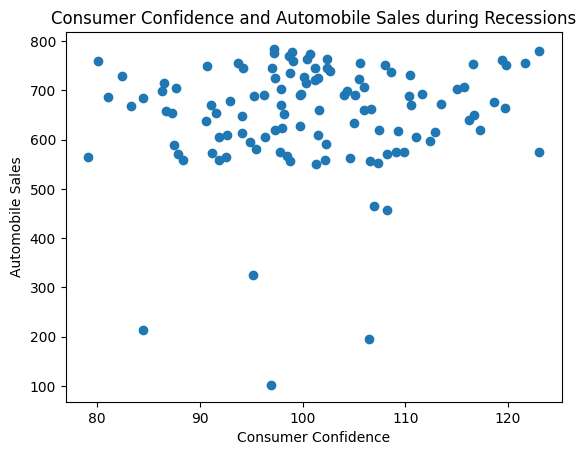

In [18]:
rec_data = df[df['Recession'] == 1]

plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

<details>
<summary>Click here for Solution template</summary>

```python
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
    plt.xlabel('.....')
    plt.ylabel('.......')
    plt.title('..........')
    plt.show()

```
</details>



 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


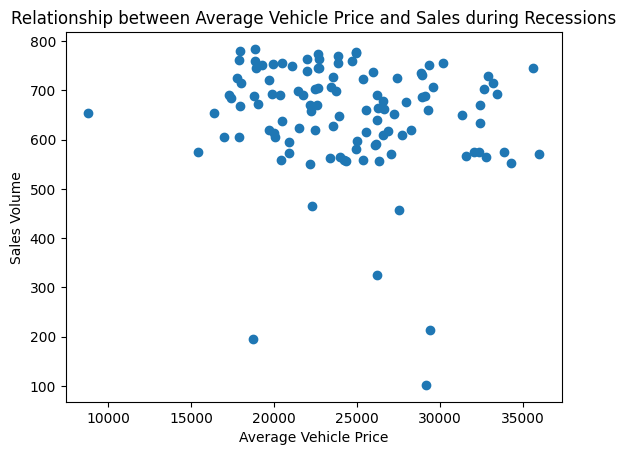

In [19]:
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales Volume')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

<details>
<summary>Click here for Solution template</summary>

```python
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
    
    plt.xlabel('.....')
    plt.ylabel('.......')
    plt.title('..........')
    plt.show()

```
</details>


### Inference
There is not much relation!<br><br>
<span style="color:red">
Save this plot as "Scatter.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


----


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?


<details><summary>Click here for a hint</summary>

<p>
     You can create two dataframe for recession and nonreccession period.
    <br> Calculate the sum of Advertising_Expenditure for both dataframes
    <br> Pass these total values to plt.pie(). May include labels as ['Recession', 'Non-Recession']
        <br>Feel Free to customie the pie further
    <br>title this plot as  - Advertising Expenditure during Recession and Non-Recession Periods</p>
</details>


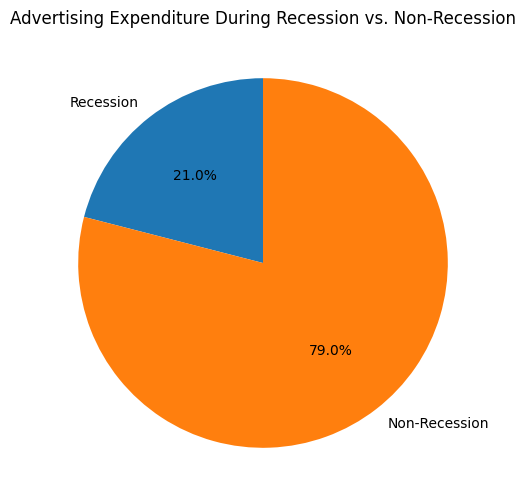

In [20]:
RAtotal = rec_data['Advertising_Expenditure'].sum()
NRAtotal = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure During Recession vs. Non-Recession')
plt.show()


<details>
<summary>Click here for Solution template</summary>

```python
    # Filter the data
    Rdata = df[df['Recession'] == 1]
    NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
    RAtotal = Rdata['...........'].sum()
    NRAtotal = NRdata['...........'].sum()

    # Create a pie chart for the advertising expenditure
    plt.figure(figsize=(8, 6))

    labels = ['Recession', 'Non-Recession']
    sizes = [RAtotal, NRtotal]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('...........................')

    plt.show()


```
</details>


#### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?<br> It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!


<span style="color:red">
Save this plot as "Pie_1.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions?


<details><summary>Click here for a hint</summary>

<p>
     You will be required to group vehicle type for sum of advertisement expenditure.
    <br> the plot a pie with the data, May include relevant labels
    <br>title this plot as  - Share of Each Vehicle Type in Total Expenditure during Recessions</p>
</details>


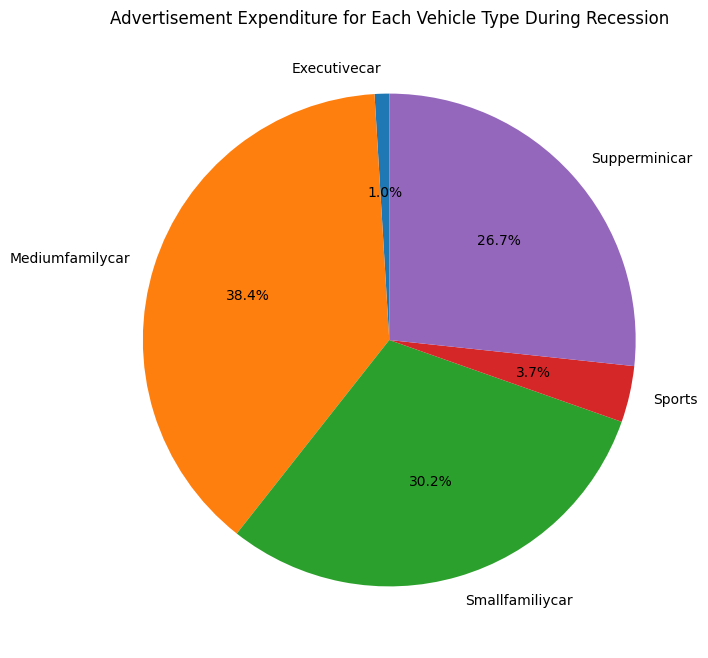

In [21]:
VTexpenditure = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(10, 8))
labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertisement Expenditure for Each Vehicle Type During Recession')
plt.show()


<details>
    <summary>Click here for Solution template</summary>

```python
    # Filter the data
    Rdata = df[df['Recession'] == 1]

    # Calculate the sales volume by vehicle type during recessions
    VTexpenditure = Rdata.groupby('..........')['.............'].sum()

    # Create a pie chart for the share of each vehicle type in total expenditure during recessions
    plt.figure(figsize=(..., ...))

    labels = VTexpenditure.index
    sizes = VTexpenditure.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('....................')

    plt.show()
```
    </details>


### Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!<br><br>
<span style="color:red">
Save this plot as "Pie_2.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


----


 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


<details><summary>Click here for a hint</summary>

<p>
    Filter out the data for recession period<br>
     Make use of lineplot() from seaborn and pass the relavent data</p>
</details>


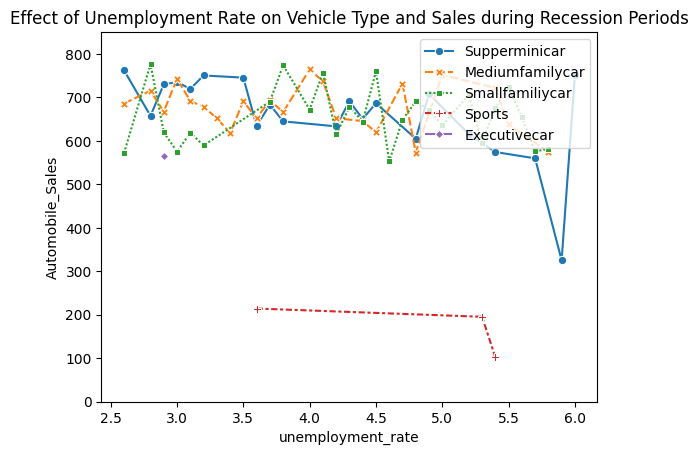

In [22]:
df_rec = df[df['Recession'] == 1]  # Make sure we're working with the right dataframe subset for recession periods

# We need to ensure that 'Unemployment_Rate' and 'Automobile_Sales' are correctly named in your DataFrame.
# Here's the adjusted plotting code assuming correct column names:
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers=True, err_style=None)
plt.ylim(0, 850)  # Adjust as necessary based on the actual sales data range
plt.legend(loc='upper right')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession Periods')
plt.show()

<details>
    <summary>Click here for Solution template</summary>

```python
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='..........', y='.........',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
```

</details>


#### From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?<br> Type your answer below:-


<details><summary>Inference</summary>
During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar<br><br>
</details>


<span style="color:red">
Save this plot as "line_plot_3.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*


---


### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

#### You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth


<details><summary>Click for Solution</summary>
    
```python

    # Filter the data for the recession period and specific cities
    recession_data = data[data['Recession'] == 1]

    # Calculate the total sales by city
    sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
    map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
    choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
    map1

```
</details>


# Congratulations! You have completed the lab


## Authors


[Dr. Pooja](author_link)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
2024-01-05|0.2.1|Sowmyaa Gurusamy|Updated the lab instructions|
|2023-06-17|0.2|Pooja|Initial Lab Creation|
|2023-05-01|0.1|Shengkai|Create Lab Template|


Copyright © 2023 IBM Corporation. All rights reserved.
